<a href="https://colab.research.google.com/github/tsussi/Cloud-variability-time-frequency/blob/master/03_tensorflow_torch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 Introduction to TensorFlow

**TensorFlow** is an open-source software library for machine learning and artificial intelligence developed by Google. It can be used across a range of tasks such as image recognition and natural language processing, but it is used mainly for training and inference of neural networks.

Some useful links and materials:
- [TensorFlow Homepage](https://www.tensorflow.org/)
- [TensorFlow Github](https://github.com/tensorflow/tensorflow)
- [TensorFlow Forum](https://www.tensorflow.org/community)

TensorFlow supports both low-level operations (for flexibility and custom models) and high-level APIs (Application Programming Interface) (like Keras). In this session, we will mainly focus on the low-level frameworks and operations.

Learning to use the lower-level frameworks in TensorFlow and PyTorch allows us to do the following:

- **Custom training loops:** more control over the training process, which can be useful for non-standard training procedures
- **Custom model:** flexibility in defining deep learning models with trainable parameters
- **Lower-level tensor operations:** fine control over tensor manipulations, e.g., custom attention layers
- **Custom loss functions:** you can define custom loss functions and evaluation metrics (this is useful for physics-informed neural networks)
- **Distributed training:** control over multi-GPU/TPU training.

In [ ]:
import tensorflow as tf
# load additional Python libraries
import matplotlib.pyplot as plt
import numpy as np
# import relevant keras libraries
from tensorflow import keras
from tensorflow.keras import layers

## TensorFlow Tensors

In TensorFlow, we use **tensors**, which are multi-dimensional arrays with a uniform type (`dtype`). Tensors are quiet similar to `np.arrays` in NumPy. In addition, all tensors are immutable like Python numbers and strings (you can never update the contents of tensor, only create a new one) except `tf.Variable`.

In [ ]:
x = tf.constant([12, 2, 37, 100])
x[0].assign(99)
print(x)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## Basic linear algebra example in Tensorflow

We can perform a matrix multiplication with TensorFlow using a code below:

## Linear regression in TensorFlow

To understand a standard workflow in TensorFlow and it is different to Keras, let's consider a simple linear model problem. We start by generating a simple data set with a single input parameter $x$ and output (response) $y$.

In [ ]:
# Define two 2 by 2 constant matrices with tf.constant
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
B = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

# Multiply the matrices
C = tf.matmul(A, B)

# Subtract the matrices
D = tf.subtract(A, B)

# Run the computation
print("Matrix A:\n", A.numpy())
print("Matrix B:\n", B.numpy())
print("A * B:\n", C.numpy())
print("A - B:\n", D.numpy())

Matrix A:
 [[1. 2.]
 [3. 4.]]
Matrix B:
 [[5. 6.]
 [7. 8.]]
A * B:
 [[19. 22.]
 [43. 50.]]
A - B:
 [[-4. -4.]
 [-4. -4.]]


In [ ]:
# Set random seed for reproducibility
np.random.seed(1234)

# Generate synthetic data
X_np = np.linspace(0, 10, 10)
y_np = 2 + 0.5*X_np + np.random.normal(0, 0.25, 10)

# Create a constant tensor
X = tf.constant(X_np.reshape(10, 1), dtype=tf.float32)
y = tf.constant(y_np.reshape(10, 1), dtype=tf.float32)

We use `matplotlib` library in Python to visualise the relationship between $x$ and $y$ below.

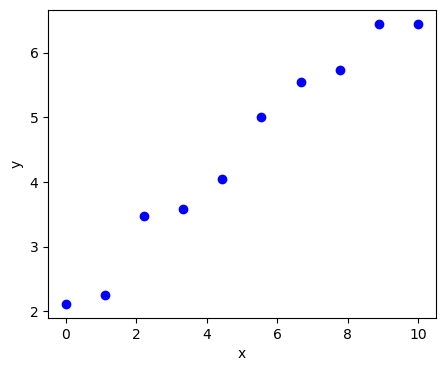

In [ ]:
# Plot synthetic data
plt.figure(figsize=(5, 4))
plt.scatter(X_np, y_np, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("fig/plotlm1.png")
plt.show()


Before we consider a standard workflow in TensorFlow, let's briefly remind ourselves how to implement a linear model in Keras.

In [ ]:
from tensorflow.keras.optimizers import SGD
# specify a linear model with keras
model = keras.Sequential([
    layers.Dense(1, input_shape=(1,), activation='linear')
])
# Configure the model with SGD optimizer
optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model.fit(X_np, y_np, epochs=1000, batch_size=10) # we want to use our whole dataset

Epoch 1/1000
1/1 [==============================] - 0s 143ms/step - loss: 1.7327
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3800
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3385
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.3219
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 1.3075
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2933
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2794
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2656
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2520
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2385
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2252
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.2120
Epoch 13/1000
1/1 [============================

Note that `model.compile` and `model.fit` functions handle the loss function specification and training loop for us. To ``access'' how well our linear model in keras performs, we can visualise the predictions produce by this model together with the training data.

1/1 [==============================] - 0s 39ms/step


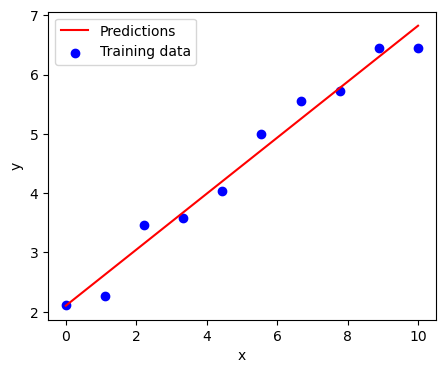

In [ ]:
# produce predictions
y_pred = model.predict(X_np)
# plot
plt.figure(figsize=(5, 4))
plt.plot(X_np,y_pred, color='red', label = "Predictions")
plt.scatter(X_np, y_np, color='blue', label = "Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In contrast to keras, TensorFlow allows us to to define **custom training loops** and **custom loss functions**. These features are highly useful for the implementation of physics-informed machine learning approaches.

In TensorFlow, we start by specifing trainable variables (model parameters). Note that the `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape which determines the type and shape of the variable.

In [ ]:
# trainable variables with tf.Variable
W = tf.Variable(tf.random.normal([1, 1]), dtype=tf.float32)
b = tf.Variable(tf.zeros([1]), dtype=tf.float32)

In TensorFlow, we can provide our own model specification as well as the loss function. With `linear_regression` function, we consider a linear model of the form:
$$
\hat{\mathbb{y}} = \mathbb{\mathrm{X}}\mathbb{\mathrm{W}} + b\mathbb{1},
$$
where:
- $\mathbb{\mathrm{X}}$ is a matrix of input features with dimensions (shapes) $[\text{n\_samples}, \text{n\_features}]$
- $\mathbb{\mathrm{W}}$ is a vector of weights (coefficients) with dimensions $[\text{n\_features}, 1]$
- $b$ is a bias term and $\mathbb{1}=(1, 1, \dots, 1)^T$

We also specify a loss function with function `loss_fn`. As before with keras, we chose a **mean squared error (MSE) loss** function:
$$
l(\mathbb{y}, \hat{\mathbb{y}}) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2.
$$

In [ ]:
# linear regression model function
def linear_regression(X): return tf.matmul(X, W) + b
# mse loss function
def loss_fn(y_true , y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred)) # `reduce_mean` computes the mean of elements across dimensions of a tensor.

To learn model parameters, it is common to use **backpropagation** which is an algorithm for training neural networks that computes gradients of a loss function with respect to model parameters (weights and biases). TensorFlow provides **autodiff framework** that uses a computational graph and backpropagation logic to calculate these gradients.

In particular, we use `tf.GradientTape` which is API for automatic differentiation in TensorFlow:

1. TensorFlow records every operation that involves `tf.Variable` inside the tape
2. TensorFlow then calculates the gradients using those recorded operations with `tape.gradient`
3. TensorFlow can then use these gradients to tell us how to update model parameters to improve model performance using `optimizer.apply_gradient`

In [ ]:
# initialise optimiser
optim = tf.optimizers.SGD(learning_rate=0.01) # gradient descent optimiser
# training loop
for epoch in range(1000):
    with tf.GradientTape() as tape: # `GradientTape` records operation for automatic differentiation
        predictions = linear_regression(X)
        loss = loss_fn(y, predictions)
    gradients = tape.gradient(loss, [W, b])
    optim.apply_gradients(zip(gradients , [W, b]))

Let's visualise the predictions produced by our linear model to access how well it performs.

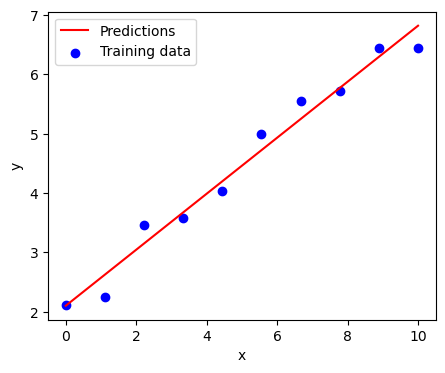

In [ ]:
# produce and plot predictions
predictions_np = linear_regression(X).numpy().flatten()
# Plot
plt.figure(figsize=(5, 4))
plt.plot(X_np, predictions_np, color='red', label = "Predictions")
plt.scatter(X_np, y_np, color='blue', label = "Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.savefig("fig/lm_model_pred.png", dpi=300, bbox_inches='tight')

## Exercises

### 3.1 (a)

Consider a function $y = sin(2x) + 0.5x^2$ defined for $x\in [-1, 2]$. Using `tf.GradientTape`, write a code to compute the $\frac{dy}{dx}$ (please see this [link](https://www.tensorflow.org/guide/autodiff) for hints)

### 3.1 (b)

Using `matplotlib`, plot the following:

- original function $y(x)$
- its gradient $\frac{dy}{dx}$ computed using TensorFlow (obtained in part 3.1 (a))
- the analytical expression of the derivative $\frac{dy}{dx} = 2\cos(2x) + x$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [ ]:
x = tf.Variable(3.0)
print(x)
with tf.GradientTape() as tape:
  y = x**2

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [ ]:
# dy = 2x * dx
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

np.float32(6.0)

# 3.2 Introduction to PyTorch

**PyTorch** is an open-source software library for machine learning and artificial intelligence developed by Meta AI. Similar to TensorFlow, it is widely used for building and training neural networks.

Some useful links and materials:

- [PyTorch Homepage](https://pytorch.org)
- [PyTorch Github](https://github.com/pytorch/pytorch)
- [PyTorch Forum](https://discuss.pytorch.org)

Note that PyTorch supports both low-level operations and high-level APIs such as `torch.nn` and `torchvision`. In this session, we will mainly focus on the low-level framework and operations. We begin by importing PyTorch library.

In [ ]:
import torch

## PyTorch Tensors

Similar to TensorFlow, all of data including inputs, outputs and trainable variables (model parameters) are expressed as **tensors**. We can use `torch.tensor` to create a new tensor object. All elements within a tensor must be of the same data type. In PyTorch, tensors are mutable objects.

In [ ]:
x = torch.tensor([12, 2, 37, 100])
x[0] = 15
print(x)

tensor([ 15,   2,  37, 100])


## Basic linear algebra example in PyTorch

We can perform basic linear algebra operations with tensors in PyTorch.

In [ ]:
# Define two 2 by 2 constant matrices with torch.tensor
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
B = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Multiply the matrices
C = torch.matmul(A, B)

# Subtract the matrices
D = A - B

# Run the computation
print("Matrix A:\n", A.numpy())
print("Matrix B:\n", B.numpy())
print("A * B:\n", C.numpy())
print("A - B:\n", D.numpy())

Matrix A:
 [[1. 2.]
 [3. 4.]]
Matrix B:
 [[5. 6.]
 [7. 8.]]
A * B:
 [[19. 22.]
 [43. 50.]]
A - B:
 [[-4. -4.]
 [-4. -4.]]


## Linear regression in PyTorch

We return back to our simple linear regression example from *Section 3.1 Introduction to TensorFlow*. Note that when we create parameters $\mathbb{\mathrm{W}}$ and $b$, we specify `requires_grad=True`, which tells PyTorch to track all operations involving this tensor, so it can compute gradients later using backpropagation and is essential for automatic differentiation.

In [ ]:
# synthetic data with torch.tensor
# convert a NumPy array to PyTorch tensor and create an independent copy
X = torch.from_numpy(X_np).clone()
y = torch.from_numpy(y_np).clone()
# parameters with gradient evaluation
W = torch.randn(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

We then proceed to specify a linear regression model and define a loss function. The workflow in PyTorch is very similar to the one in TensorFlow.

In [ ]:
# linear model
def linear_regression(X):
    return X * W + b
# Define loss function (Mean Squared Error)
def loss_fn(y_true , y_pred):
    return torch.mean((y_true - y_pred) ** 2)

To learn model parameters, we will use backpropagation in PyTorch. **Automatic differentiation** (autodiff) in PyTorch automatically computes gradients (derivatives) of tensors during model training and it is therefore crucial for backpropagation. In particular, PyTorch uses a **dynamic computational graph** and tracks all operations performed on tensors with `required_grad=True`. During each iterations of the training loop, we perform the following operations:

1. Clear old gradients with `optimizer.zero_grad()`
2. Compute ML model predictions and loss
3. Backpropagate to get gradients with `loss.backward()`
4. Update weights to reduce the loss with `optimizer.step()`


In [ ]:
# Define optimizer
optimizer = torch.optim.SGD([W, b], lr=0.01)
# Training loop
for step in range(1000):
    optimizer.zero_grad()
    predictions = linear_regression(X)
    loss = loss_fn(y, predictions)
    loss.backward()
    optimizer.step()

We can produce predictions of this linear model in PyTorch and visualise these predictions against training data:

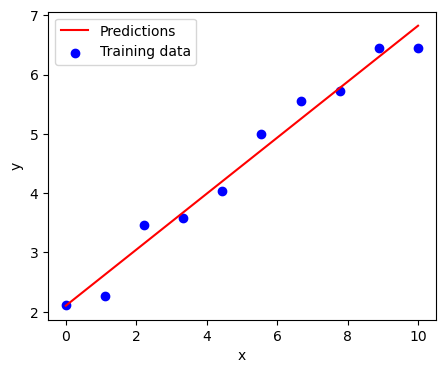

In [ ]:
# produce predictions:
predictions.np = predictions.detach().numpy()
# Plot
plt.figure(figsize=(5, 4))
plt.plot(X_np, predictions.np, color='red', label = "Predictions")
plt.scatter(X_np, y_np, color='blue', label = "Training data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# Define optimizer
optimizer = torch.optim.SGD([W, b], lr=0.01)
# Training loop
for step in range(1000):
    optimizer.zero_grad()
    y1 = x**2+3x
    y2 = sin(y1)
    loss = loss_fn(y2, predictions)
    loss.backward()
    optimizer.step()

## Exercises

### 3.2 (a)

In PyTorch using `tensor.backward`, compute the derivative with respect to $x$ of
$$
y_2 = \sin(y_1), \text{ where }y_1=x^2+3x,
$$
for $x\in [-1, 2]$.

### 3.2 (b)

Using `matplotlib`, plot the following:

- original function $y_2(x)$
- its gradient $\frac{dy_2}{dx}$ computed using PyTorch (obtained in part 3.2 (a))
- the analytical expression of the derivative $\frac{dy_2}{dx} = \cos(x^2 + 3x)\times (2x+3)$

